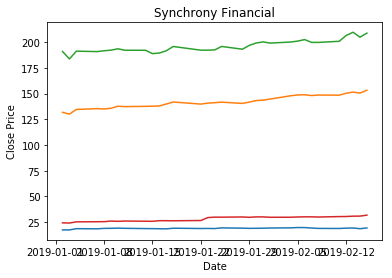

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates
import pandas_datareader as web
import datetime
pd.options.mode.chained_assignment = None  # default='warn'


bayer_stock_prices = pd.read_csv('bayer_stock_prices.csv')
honeywell_stock_prices = pd.read_csv('honeywell_stock_prices.csv')
mmm_stock_prices = pd.read_csv('3m_stock_prices.csv')
Synchrony_stock_prices = pd.read_csv('Synchrony_stock_prices.csv')

#listed alphabetically, we'll keep this order consistent
all_data = [bayer_stock_prices, honeywell_stock_prices, mmm_stock_prices, Synchrony_stock_prices]

labels = ['Bayer', 'HoneyWell', '3M', 'Synchrony Financial']

for i,data in enumerate(all_data):
    all_data[i]=data.dropna(axis=0)
    
for data in all_data:
    df1=data[mmm_stock_prices.isnull().any(axis=1)]

for i,data in enumerate(all_data):
    df=data
    df['Date'] = pd.to_datetime(df['Date'])

    # Using matplotlib to add required columns
    plt.plot(df['Date'], df['Close'])

    # Adding labels
    plt.xlabel('Date')  
    plt.ylabel('Close Price')  
    plt.title(labels[i]) 


In [139]:
start = datetime.datetime(2014, 1, 1)
end = datetime.datetime(2019, 1, 1)

symbols = ['syf', 'bayry', 'hon', 'mmm']

for symbol in symbols:
    df = web.DataReader(symbol, 'yahoo', start, end)
    print(symbol + " average")
    print(df["Close"].mean())
    print(symbol + " standard deviation")
    print(df["Close"].std())





syf average
30.991597870735976
syf standard deviation
3.6641997126629406
bayry average
23.353398703282174
bayry standard deviation
4.343520627326744
hon average
113.73010480545929
hon standard deviation
21.66078420053503
mmm average
176.78613987226538
mmm standard deviation
30.02304552644815


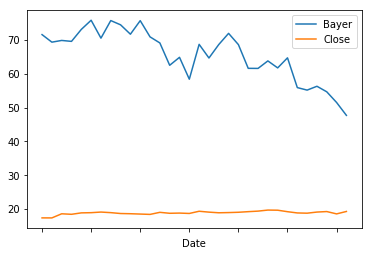

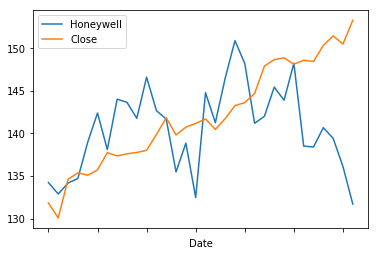

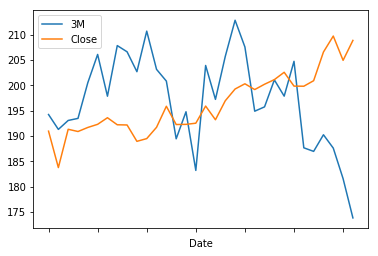

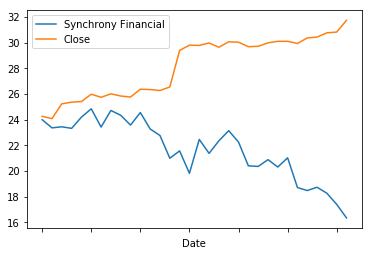

In [28]:
ax = plt.gca()
predicted_prices = pd.read_csv('Predicted/submission.csv')

#for company in list(predicted_prices):
#    if company == 'Date':
#        continue
#    else:
#        predicted_prices.plot(x = 'Date', y = company)

predicted_prices.plot(x = 'Date', y = 'Bayer', ax = ax)
bayer_stock_prices.plot(x = 'Date', y = 'Close', ax = ax)
plt.show()
plt.close()

ax = plt.gca()
predicted_prices.plot(x = 'Date', y = 'Honeywell', ax = ax)
honeywell_stock_prices.plot(x = 'Date', y = 'Close', ax = ax)
plt.show()
plt.close()

ax = plt.gca()
predicted_prices.plot(x = 'Date', y = '3M', ax = ax)
mmm_stock_prices.plot(x = 'Date', y = 'Close', ax = ax)
plt.show()
plt.close()

ax = plt.gca()
predicted_prices.plot(x = 'Date', y = 'Synchrony Financial', ax = ax)
Synchrony_stock_prices.plot(x = 'Date', y = 'Close', ax = ax)
plt.show()
plt.close()




In [34]:
#https://stackoverflow.com/questions/17197492/is-there-a-library-function-for-root-mean-square-error-rmse-in-python
def rmse(predictions, targets):

    differences = predictions - targets                       

    differences_squared = differences ** 2                    

    mean_of_differences_squared = differences_squared.mean()  

    rmse_val = np.sqrt(mean_of_differences_squared)           

    return rmse_val

predictedBayer = predicted_prices['Bayer'].tolist()
actualBayer = bayer_stock_prices['Close'].tolist()
day = 1
print('Bayer')
for price, realPrice in zip(predictedBayer, actualBayer):
    print("Difference on Day " + str(day))
    print(realPrice - price)
    print('RMSE:')
    print(rmse(realPrice, price))
    day += 1

print('Honeywell')
predictedHoneywell = predicted_prices['Honeywell'].tolist()
actualHoneywell = honeywell_stock_prices['Close'].tolist()
day = 1

for price, realPrice in zip(predictedHoneywell, actualHoneywell):
    print("Difference on Day " + str(day))
    print(realPrice - price)
    print('RMSE:')
    print(rmse(realPrice, price))
    day += 1

print('3M')
predictedMMM = predicted_prices['3M'].tolist()
actualMMM = mmm_stock_prices['Close'].tolist()
day = 1

for price, realPrice in zip(predictedMMM, actualMMM):
    print("Difference on Day " + str(day))
    print(realPrice - price)
    print('RMSE:')
    print(rmse(realPrice, price))
    day += 1

print("Synchrony Financial")
predictedSynchrony = predicted_prices['Synchrony Financial'].tolist()
actualSynchrony = Synchrony_stock_prices['Close'].tolist()
day = 1

for price, realPrice in zip(predictedMMM, actualMMM):
    print("Difference on Day " + str(day))
    print(realPrice - price)
    print('RMSE:')
    print(rmse(realPrice, price))
    day += 1




Bayer
Difference on Day 1
-54.193065061556126
RMSE:


AttributeError: 'float' object has no attribute 'mean'